In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [ ]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


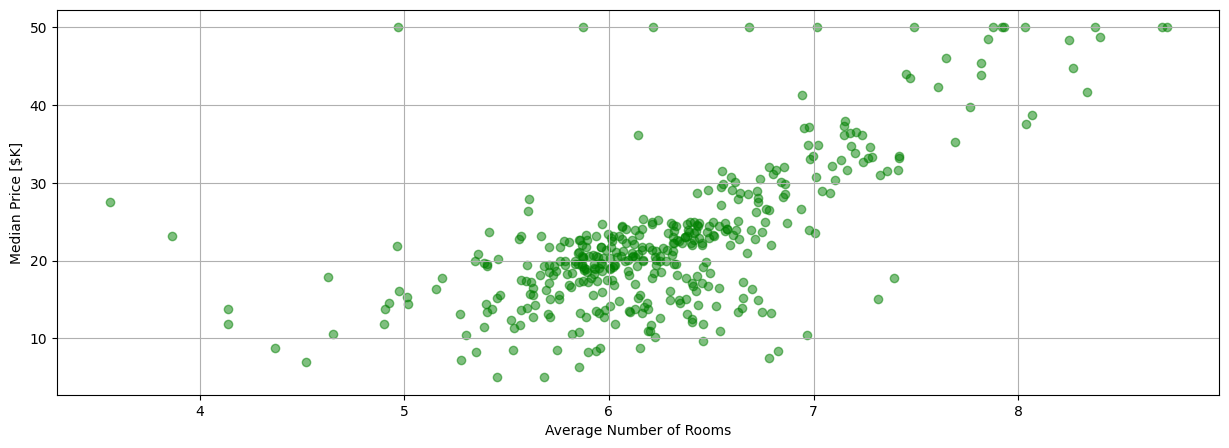

In [ ]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

In [ ]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [ ]:
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)


Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 342.8141 - val_loss: 436.7267
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 315.9314 - val_loss: 412.1873
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 295.4195 - val_loss: 389.2687
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 276.1680 - val_loss: 367.3009
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 257.7950 - val_loss: 346.1906
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 240.2457 - val_loss: 325.9231
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 223.5105 - val_loss: 306.4953
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 207.5864 - val_loss: 287.9058
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 192.4714 - val_loss: 270.1534
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 178.1631 - val_loss: 253.2366
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 164.6590 - val_loss: 237.1543
Epoch 12/101
18/

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

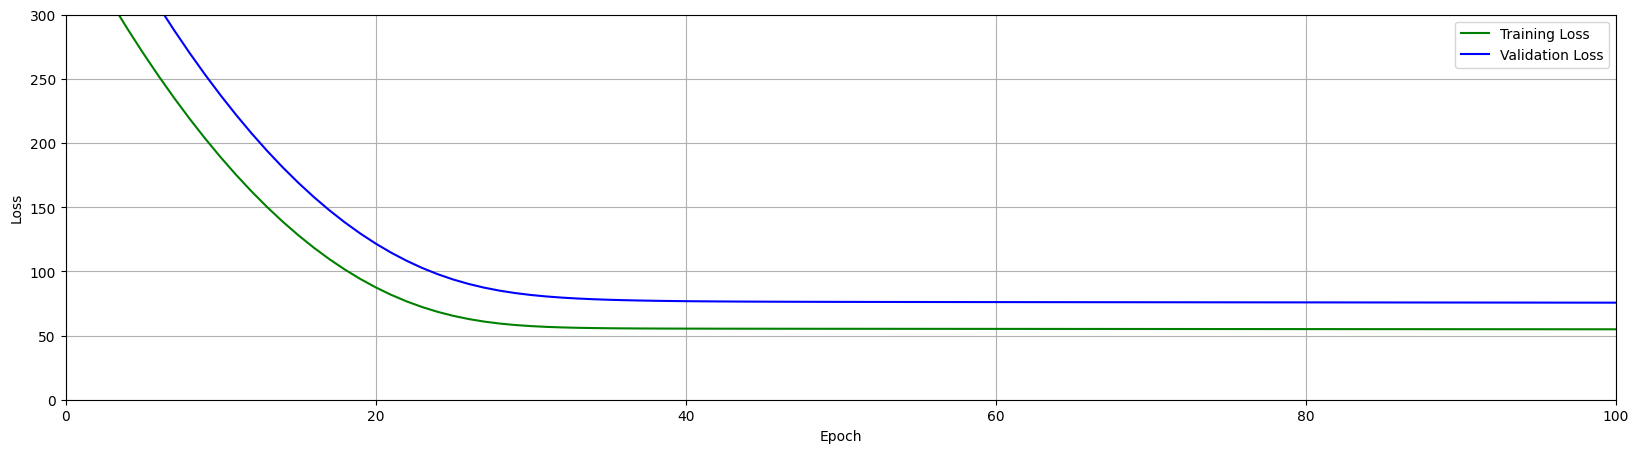

In [ ]:
plot_loss(history)

In [ ]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

ValueError: Unrecognized data type: x=[3, 4, 5, 6, 7] (of type <class 'list'>)

In [ ]:
# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

ValueError: Unrecognized data type: x=[3, 4, 5, 6, 7] (of type <class 'list'>)

In [ ]:
import numpy as np
x = [3, 4, 5, 6, 7]
x = np.reshape(x, (-1, 1))  # Reshape x to have shape (5, 1)
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx][0]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted price of a home with 3 rooms: $11.6K
Predicted price of a home with 4 rooms: $14.8K
Predicted price of a home with 5 rooms: $18.1K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


<ipython-input-14-6f93fe87c461>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price of a home with {x[idx][0]} rooms: ${int(y_pred[idx] * 10) / 10}K")


In [ ]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


In [ ]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


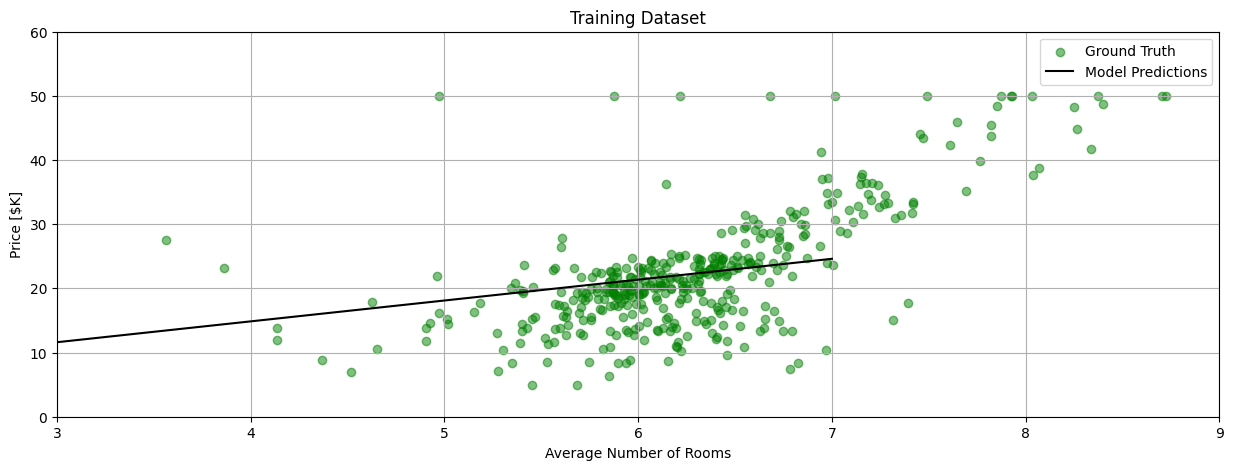

In [ ]:
y_pred = model.predict(x)
plot_data(X_train_1d, y_train, x, y_pred, title='Training Dataset') # Call plot_data with predicted values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


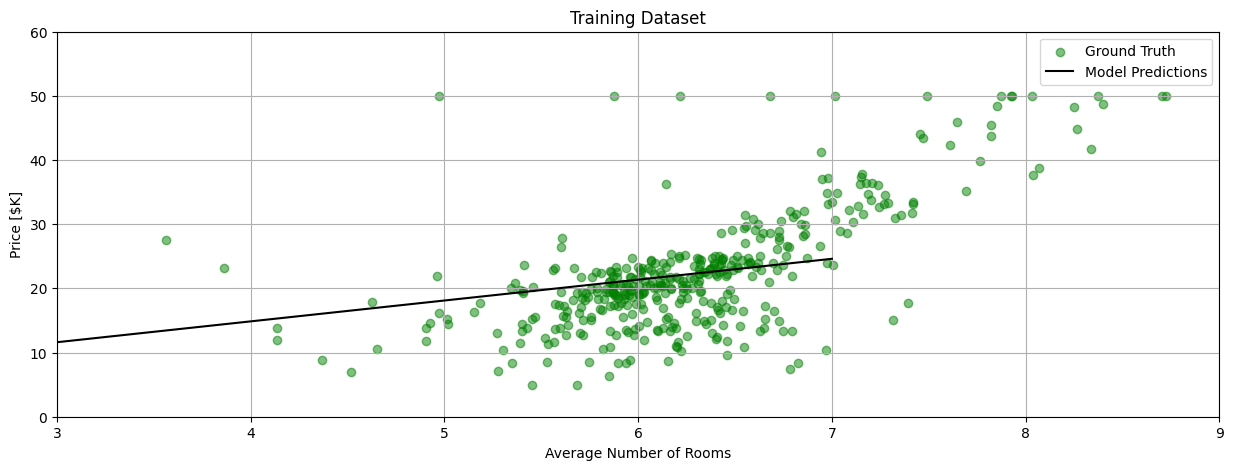

In [ ]:
y_pred = model.predict(x)
plot_data(X_train_1d, y_train, x, y_pred, title='Training Dataset') # Call plot_data with predicted values